<a href="https://colab.research.google.com/github/shekharkoirala/machinelearning_algorithms_analysis/blob/master/stanfordcourse/tf_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
import time
import datetime
tf.reset_default_graph()

In [0]:
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 0.25
a[0, 1, :, :] = 0.125
a[1, 0, :, :] = 0.125
a[2, 1, :, :] = 0.125
a[1, 2, :, :] = 0.125
a[0, 0, :, :] = 0.0625
a[0, 2, :, :] = 0.0625
a[2, 0, :, :] = 0.0625
a[2, 2, :, :] = 0.0625

BLUR_FILTER_RGB = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 1, 1])
# a[1, 1, :, :] = 0.25
# a[0, 1, :, :] = 0.125
# a[1, 0, :, :] = 0.125
# a[2, 1, :, :] = 0.125
# a[1, 2, :, :] = 0.125
# a[0, 0, :, :] = 0.0625
# a[0, 2, :, :] = 0.0625
# a[2, 0, :, :] = 0.0625
# a[2, 2, :, :] = 0.0625
a[1, 1, :, :] = 1.0
a[0, 1, :, :] = 1.0
a[1, 0, :, :] = 1.0
a[2, 1, :, :] = 1.0
a[1, 2, :, :] = 1.0
a[0, 0, :, :] = 1.0
a[0, 2, :, :] = 1.0
a[2, 0, :, :] = 1.0
a[2, 2, :, :] = 1.0
BLUR_FILTER = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1

SHARPEN_FILTER_RGB = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1

SHARPEN_FILTER = tf.constant(a, dtype=tf.float32)

# a = np.zeros([3, 3, 3, 3])
# a[:, :, :, :] = -1
# a[1, 1, :, :] = 8

# EDGE_FILTER_RGB = tf.constant(a, dtype=tf.float32)

EDGE_FILTER_RGB = tf.constant([
			[[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]],
            [[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ 8., 0., 0.], [ 0., 8., 0.], [ 0., 0., 8.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]],
			[[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]]
])

a = np.zeros([3, 3, 1, 1])
# a[:, :, :, :] = -1
# a[1, 1, :, :] = 8
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[1, 2, :, :] = -1
a[2, 1, :, :] = -1
a[1, 1, :, :] = 4

EDGE_FILTER = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 3, 3])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2 # originally 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2

TOP_SOBEL_RGB = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 1, 1])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2 # originally 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2

TOP_SOBEL = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 3, 3])
a[0, 0, :, :] = -2
a[0, 1, :, :] = -1 
a[1, 0, :, :] = -1
a[1, 1, :, :] = 1
a[1, 2, :, :] = 1
a[2, 1, :, :] = 1
a[2, 2, :, :] = 2

EMBOSS_FILTER_RGB = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 1, 1])
a[0, 0, :, :] = -2
a[0, 1, :, :] = -1 
a[1, 0, :, :] = -1
a[1, 1, :, :] = 1
a[1, 2, :, :] = 1
a[2, 1, :, :] = 1
a[2, 2, :, :] = 2
EMBOSS_FILTER = tf.constant(a, dtype=tf.float32)

In [0]:
# read image
# tf.reset_default_graph()
image_name = tf.read_file("image.jpg")
image_decoded = tf.image.decode_image(image_name)
image = tf.cast(image_decoded, tf.float32)/266.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3000, 4000, 3)
(1000, 1334, 3)
(1000, 1334, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(1000, 1334, 3)
(1000, 1334, 3)
(1000, 1334, 3)


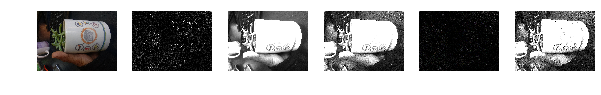

In [167]:
# read image
# tf.reset_default_graph()
image_name = tf.read_file("image.jpg")
image_decoded = tf.image.decode_image(image_name)
image = tf.cast(image_decoded, tf.float32)/266.0

def convolve(image, kernels, rgb=True, strides= [1,3,3,1], padding="SAME"):
  images = [image[0]] #single image from since batch is already added
  for i, kernel in enumerate(kernels):
    filtered_image = tf.nn.conv2d(image,
                                  kernel,
                                  strides= strides,
                                  padding= padding)[0]
    if i ==2:
      filtered_image = tf.minimum(tf.nn.relu(filtered_image), 255)
    images.append(filtered_image)
  return images # added image from different kernels

rgb = True
# kernel_list = [SHARPEN_FILTER_RGB, EMBOSS_FILTER_RGB, TOP_SOBEL_RGB,EDGE_FILTER_RGB ]
if rgb:
  kernel_list = [TOP_SOBEL_RGB,
                 BLUR_FILTER_RGB,
                 SHARPEN_FILTER_RGB,
                 EDGE_FILTER_RGB,
                 EMBOSS_FILTER_RGB]
else:
  kernel_list = [TOP_SOBEL,
                 BLUR_FILTER,
                 SHARPEN_FILTER,
                 EDGE_FILTER,
                 EMBOSS_FILTER]


if not rgb:
  image = tf.image.rgb_to_grayscale(image)

image = tf.expand_dims(image, 0) # [h,w,c] -- > [ b, h, w, c]
images = convolve(image, kernel_list, rgb)
with tf.Session() as sess:
  images = sess.run(images)

fig1 = plt.figure(figsize = (10,10)) 
gs = gridspec.GridSpec(1, len(images)) # grid spaceof image
for i , image in enumerate(images):
  print(image.shape)
  ax1 = fig1.add_subplot(gs[0,i])
  if rgb:
    ax1.imshow(image)
  else:
    image = image.reshape(image.shape[0], image.shape[1])
    ax1.imshow(image, cmap='gray')
  plt.axis("off")
plt.show()

fig1.savefig('example_rgb.png', dpi = 1000)


(3000, 4000, 1)
(1000, 1334, 1)
(1000, 1334, 1)
(1000, 1334, 1)
(1000, 1334, 1)
(1000, 1334, 1)


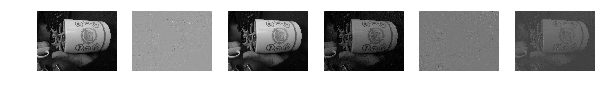

In [171]:
# read image
# tf.reset_default_graph()
image_name = tf.read_file("image.jpg")
image_decoded = tf.image.decode_image(image_name)
image = tf.cast(image_decoded, tf.float32)/266.0

def convolve(image, kernels, rgb=True, strides= [1,3,3,1], padding="SAME"):
  images = [image[0]] #single image from since batch is already added
  for i, kernel in enumerate(kernels):
    filtered_image = tf.nn.conv2d(image,
                                  kernel,
                                  strides= strides,
                                  padding= padding)[0]
    if i ==2:
      filtered_image = tf.minimum(tf.nn.relu(filtered_image), 255)
    images.append(filtered_image)
  return images # added image from different kernels

rgb = False
# kernel_list = [SHARPEN_FILTER_RGB, EMBOSS_FILTER_RGB, TOP_SOBEL_RGB,EDGE_FILTER_RGB ]
if rgb:
  kernel_list = [TOP_SOBEL_RGB,
                 BLUR_FILTER_RGB,
                 SHARPEN_FILTER_RGB,
                 EDGE_FILTER_RGB,
                 EMBOSS_FILTER_RGB]
else:
  kernel_list = [TOP_SOBEL,
                 BLUR_FILTER,
                 SHARPEN_FILTER,
                 EDGE_FILTER,
                 EMBOSS_FILTER]


if not rgb:
  image = tf.image.rgb_to_grayscale(image)

image = tf.expand_dims(image, 0) # [h,w,c] -- > [ b, h, w, c]
images = convolve(image, kernel_list, rgb)
with tf.Session() as sess:
  images = sess.run(images)

fig1 = plt.figure(figsize = (10,10)) 
gs = gridspec.GridSpec(1, len(images)) # grid spaceof image
for i , image in enumerate(images):
  print(image.shape)
  ax1 = fig1.add_subplot(gs[0,i])
  if rgb:
    ax1.imshow(image)
  else:
    image = image.reshape(image.shape[0], image.shape[1])
    ax1.imshow(image, cmap='gray')
  plt.axis("off")
plt.show()

fig1.savefig('example.png', dpi = 1000)
